# Data

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('../raw_data/final_data.csv')

In [3]:
df.drop('Unnamed: 0', axis = 1, inplace=True)

In [4]:
df.shape

(950, 20)

In [5]:
df.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,innings_total,TeamA_batting_average,TeamB_batting_average,TeamA_innings_total,TeamB_innings_total,Team1_points_against_avg,Team2_points_against_avg,Team1_MVP_average,Team2_MVP_average
0,1312200,ahmedabad,2022-05-29,2022,final,rajasthan royals,gujarat titans,"narendra modi stadium, ahmedabad",rajasthan royals,bat,gujarat titans,130,155.397906,166.437500,130.0,133.0,151.561798,167.666667,0.500000,0.687500
1,1312199,ahmedabad,2022-05-27,2022,qualifier 2,royal challengers bangalore,rajasthan royals,"narendra modi stadium, ahmedabad",rajasthan royals,field,rajasthan royals,157,155.707965,155.397906,157.0,161.0,146.976000,162.184466,0.491150,0.500000
2,1312198,kolkata,2022-05-25,2022,eliminator,royal challengers bangalore,lucknow super giants,eden gardens,lucknow super giants,field,royal challengers bangalore,207,155.707965,169.866667,207.0,193.0,146.976000,176.285714,0.491150,0.600000
3,1312197,kolkata,2022-05-24,2022,qualifier 1,rajasthan royals,gujarat titans,eden gardens,gujarat titans,field,gujarat titans,188,155.397906,166.437500,188.0,191.0,151.561798,167.666667,0.500000,0.687500
4,1304116,mumbai,2022-05-22,2022,70,sunrisers hyderabad,punjab kings,wankhede stadium,sunrisers hyderabad,bat,punjab kings,157,155.546053,158.518349,157.0,160.0,145.594203,164.537037,0.486842,0.428571


# Preprocessing

## Rename columns

In [6]:
df.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'WinningTeam', 'innings_total',
       'TeamA_batting_average', 'TeamB_batting_average', 'TeamA_innings_total',
       'TeamB_innings_total', 'Team1_points_against_avg',
       'Team2_points_against_avg', 'Team1_MVP_average', 'Team2_MVP_average'],
      dtype='object')

In [7]:
# rename columns TeamA and TeamB to Team1 and Team2
df = df.rename({'TeamA_batting_average': 'Team1_batting_average',
           'TeamB_batting_average': 'Team2_batting_average',
           'TeamA_innings_total': 'Team1_innings_total',
           'TeamB_innings_total' : 'Team2_innings_total'
          }, axis=1)

In [8]:
df.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'WinningTeam', 'innings_total',
       'Team1_batting_average', 'Team2_batting_average', 'Team1_innings_total',
       'Team2_innings_total', 'Team1_points_against_avg',
       'Team2_points_against_avg', 'Team1_MVP_average', 'Team2_MVP_average'],
      dtype='object')

## Drop Columns

In [9]:
columns_to_delete = ['Date', 'innings_total', 'Team1_innings_total', 'Team2_innings_total'] 

In [10]:
df.drop(columns=columns_to_delete, axis=1, inplace=True)

## Encoding

### Toss Decision

In [11]:
# Toss Decision --> 0 = bat ; 1 = field

label_encoder = LabelEncoder()

In [12]:
label_encoder.fit(df['TossDecision'])

LabelEncoder()

In [13]:
df['TossDecision'] = label_encoder.transform(df['TossDecision'])

### City

In [14]:
# model
ohe = OneHotEncoder(sparse_output=False)

In [15]:
ohe.fit(df[['City']])

OneHotEncoder(sparse_output=False)

In [16]:
df[ohe.get_feature_names_out()] = ohe.transform(df[['City']])

In [17]:
df.drop(columns = ["City"], inplace = True)

In [18]:
df.shape

(950, 48)

### Match Number

In [19]:
df.MatchNumber.unique() # playoffs = 1 ; regular games = 0

array(['final', 'qualifier 2', 'eliminator', 'qualifier 1', '70', '69',
       '68', '67', '66', '65', '64', '63', '62', '61', '60', '59', '58',
       '57', '56', '55', '54', '53', '52', '51', '50', '49', '48', '47',
       '46', '45', '44', '43', '42', '41', '40', '39', '38', '37', '36',
       '35', '34', '33', '32', '31', '30', '29', '28', '27', '26', '25',
       '24', '23', '22', '21', '20', '19', '18', '17', '16', '15', '14',
       '13', '12', '11', '10', '9', '8', '7', '6', '5', '4', '3', '2',
       '1', 'qualifier', 'elimination final', '72', '71',
       '3rd place play-off', 'semi final'], dtype=object)

In [20]:
# function
def map_match_number(value):
    if isinstance(value, int) or value.isnumeric():
        return 0
    elif isinstance(value, str):
        return 1
    else:
        return value

In [21]:
df['MatchNumber'] = df['MatchNumber'].apply(map_match_number)

In [22]:
df.rename(columns={'MatchNumber': 'MatchImportance'}, inplace=True)

In [23]:
df.MatchImportance.value_counts() # ok

MatchImportance
0    892
1     58
Name: count, dtype: int64

### Winning Team

In [24]:
# WinningTeam = 1 --> Team1 Won

In [25]:
df.WinningTeam.value_counts()

WinningTeam
mumbai indians                 131
chennai super kings            121
kolkata knight riders          114
royal challengers bangalore    109
delhi capitals                 103
punjab kings                   101
rajasthan royals                96
sunrisers hyderabad             75
deccan chargers                 29
rising pune supergiant          15
gujarat lions                   13
gujarat titans                  12
pune warriors                   12
lucknow super giants             9
kochi tuskers kerala             6
noresults                        4
Name: count, dtype: int64

In [26]:
# function
def map_winning_team(row):
    if row['WinningTeam'] == row['Team1']:
        return 1
    elif row['WinningTeam'] == row['Team2']:
        return 0
    else:
        return -1

In [27]:
df['WinningTeam'] = df.apply(map_winning_team, axis=1)

In [28]:
df.WinningTeam.value_counts()

WinningTeam
 1    480
 0    466
-1      4
Name: count, dtype: int64

In [29]:
# drop rows with Winning Team = -1
df = df.drop(df[df['WinningTeam'] == -1].index)

In [30]:
df.WinningTeam.unique()

array([0, 1])

### Venue

In [31]:
ohe = OneHotEncoder(sparse_output=False)

In [32]:
ohe.fit(df[['Venue']])

OneHotEncoder(sparse_output=False)

In [33]:
df[ohe.get_feature_names_out()] = ohe.transform(df[['Venue']])

In [34]:
df.drop(columns = ["Venue"], inplace = True)

In [35]:
df.shape

(946, 83)

### Toss Winner

In [36]:
# Toss Winner --> 0 = away team ; 1 = home team

In [37]:
def map_toss_winner(row):
    if row['TossWinner'] == row['Team1']:
        return 1
    elif row['TossWinner'] == row['Team2']:
        return 0
    else:
        return -1

In [38]:
df['TossWinner'] = df.apply(map_toss_winner, axis=1)

In [39]:
df.TossWinner.value_counts()

TossWinner
0    563
1    383
Name: count, dtype: int64

### Team1 and Team2

In [40]:
#hot encoder -- team 1
ohe = OneHotEncoder(sparse_output=False)

In [41]:
ohe.fit(df[['Team1']])

OneHotEncoder(sparse_output=False)

In [42]:
df[ohe.get_feature_names_out()] = ohe.transform(df[['Team1']])

In [43]:
df.drop(columns = ["Team1"], inplace = True)

In [44]:
df.shape

(946, 97)

In [45]:
# team2
ohe = OneHotEncoder(sparse_output=False)

In [46]:
ohe.fit(df[['Team2']])

OneHotEncoder(sparse_output=False)

In [47]:
df[ohe.get_feature_names_out()] = ohe.transform(df[['Team2']])

/var/folders/2n/3_ffywf16v9b2gcv5svq7k8c0000gp/T/ipykernel_34720/3559460154.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = ohe.transform(df[['Team2']])
/var/folders/2n/3_ffywf16v9b2gcv5svq7k8c0000gp/T/ipykernel_34720/3559460154.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = ohe.transform(df[['Team2']])
/var/folders/2n/3_ffywf16v9b2gcv5svq7k8c0000gp/T/ipykernel_34720/3559460154.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually t

In [48]:
df.drop(columns = ["Team2"], inplace = True)

In [49]:
df.shape

(946, 111)

## Scaler

In [50]:
df.columns

Index(['ID', 'Season', 'MatchImportance', 'TossWinner', 'TossDecision',
       'WinningTeam', 'Team1_batting_average', 'Team2_batting_average',
       'Team1_points_against_avg', 'Team2_points_against_avg',
       ...
       'Team2_kochi tuskers kerala', 'Team2_kolkata knight riders',
       'Team2_lucknow super giants', 'Team2_mumbai indians',
       'Team2_pune warriors', 'Team2_punjab kings', 'Team2_rajasthan royals',
       'Team2_rising pune supergiant', 'Team2_royal challengers bangalore',
       'Team2_sunrisers hyderabad'],
      dtype='object', length=111)

In [51]:
columns_scaler = ['Team1_batting_average', 'Team2_batting_average', 'Team1_points_against_avg', 'Team2_points_against_avg',
                 'Team1_MVP_average', 'Team2_MVP_average']

In [52]:
# Robust Scaler
scaler = RobustScaler()

In [53]:
# fit
scaler.fit(df[columns_scaler])

RobustScaler()

In [54]:
df[columns_scaler] = scaler.transform(df[columns_scaler]) 

In [55]:
df.head()

,ID,Season,MatchImportance,TossWinner,TossDecision,WinningTeam,Team1_batting_average,Team2_batting_average,Team1_points_against_avg,Team2_points_against_avg,...,Team2_kochi tuskers kerala,Team2_kolkata knight riders,Team2_lucknow super giants,Team2_mumbai indians,Team2_pune warriors,Team2_punjab kings,Team2_rajasthan royals,Team2_rising pune supergiant,Team2_royal challengers bangalore,Team2_sunrisers hyderabad
0,1312200,2022,1,1,0,0,-0.062514,2.286254,0.330287,1.582223,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1312199,2022,1,0,1,0,0.000000,-0.031098,-0.491163,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1312198,2022,1,0,1,1,0.000000,3.006079,-0.491163,4.069775,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1312197,2022,1,0,1,0,-0.062514,2.286254,0.330287,1.582223,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1304116,2022,0,1,0,0,-0.032645,0.623923,-0.738684,0.678978,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [56]:
df.shape

(946, 111)

# Random Forest

In [57]:
df = df.dropna()#  MISSING VALUES

In [58]:
X = df.drop(['WinningTeam'], axis=1)
y = df.WinningTeam

In [59]:
X.shape, y.shape

((946, 110), (946,))

In [60]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
# model
rf = RandomForestClassifier()

In [62]:
# cross valdation
cv = cross_validate(rf, X, y, cv=5)

In [63]:
cv

{'fit_time': array([0.36452317, 0.35022998, 0.34623098, 0.35114121, 0.40254116]),
 'score_time': array([0.01508808, 0.01858497, 0.01860714, 0.01929069, 0.02107787]),
 'test_score': array([0.49473684, 0.41798942, 0.46560847, 0.49206349, 0.5026455 ])}

In [64]:
cv['test_score'].mean()

0.4746087440824283

In [65]:
# fit the model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [66]:
y_pred = rf.predict(X_test)

In [67]:
accuracy = accuracy_score(y_test, y_pred)

In [68]:
print(f"Accuracy Model with Random Forest: {accuracy}")

Accuracy Model with Random Forest: 0.5176056338028169


In [69]:
confusion = confusion_matrix(y_test, y_pred)

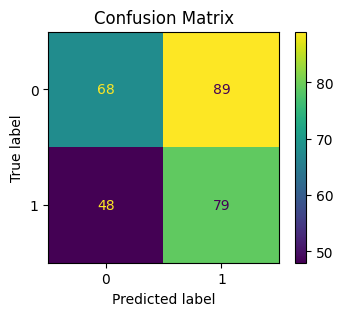

In [70]:
fig, ax = plt.subplots(figsize=(4,3), dpi=100)
display = ConfusionMatrixDisplay(confusion, display_labels=[0,1])
ax.set(title='Confusion Matrix')

display.plot(ax=ax);

# SGD Classifier

In [71]:
from sklearn.linear_model import SGDClassifier

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [73]:
# SGDClassifier
sgd = SGDClassifier(max_iter=1000, random_state=42)

In [74]:
# cross valdation
cv = cross_validate(rf, X, y, cv=5)

In [75]:
cv

{'fit_time': array([0.34538174, 0.33178878, 0.33034396, 0.3392787 , 0.32256413]),
 'score_time': array([0.01863194, 0.02062821, 0.01630116, 0.01921201, 0.01476407]),
 'test_score': array([0.5       , 0.41269841, 0.46560847, 0.50793651, 0.4973545 ])}

In [76]:
cv['test_score'].mean()

0.47671957671957665

In [77]:
# fit 
sgd.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [78]:
# prevision
y_pred = sgd.predict(X_test)

In [79]:
accuracy = accuracy_score(y_test, y_pred)
print(f"SGD accuracy: {accuracy}")

SGD accuracy: 0.4471830985915493


# Kernel Approximation

In [80]:
from sklearn.kernel_approximation import RBFSampler

In [81]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
# Crie um objeto RBFSampler para aproximar o kernel RBF
rbf_sampler = RBFSampler(n_components=100, random_state=42)

In [83]:
# Aplique a aproximação do kernel aos dados de treinamento
X_train_approximated = rbf_sampler.fit_transform(X_train)

In [84]:
# Treine o modelo usando os dados de treinamento aproximados
sgd.fit(X_train_approximated, y_train)

SGDClassifier(random_state=42)

In [85]:
# Aplique a mesma aproximação do kernel aos dados de teste
X_test_approximated = rbf_sampler.transform(X_test)

In [86]:
# Avalie o desempenho do modelo usando a precisão
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo com aproximação do kernel: {accuracy}")

Acurácia do modelo com aproximação do kernel: 0.4471830985915493


In [87]:

# Avalie o desempenho do modelo usando a precisão
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo com aproximação do kernel: {accuracy}")

Acurácia do modelo com aproximação do kernel: 0.4471830985915493


# XG Boost

In [88]:
import xgboost as xgb

In [89]:
y_train.value_counts()

WinningTeam
1    353
0    309
Name: count, dtype: int64

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [91]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

/Users/mgomboski/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/mgomboski/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/mgomboski/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/mgomboski/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarnin

In [92]:
params = {
    'objective': 'multi:softmax',
    'num_class': 2,
    'max_depth': 3,
    'eta': 0.1,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
}

In [93]:
# train
num_round = 100
bst = xgb.train(params, dtrain, num_round)

In [94]:
y_pred = bst.predict(dtest)

In [95]:
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Aaccuracy: {accuracy}")

XGBoost Aaccuracy: 0.528169014084507


# SVM Model

In [96]:
from sklearn.svm import SVC

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [98]:
svc = SVC()

In [99]:
svc.fit(X_train, y_train)

SVC()

In [100]:
y_pred = svc.predict(X_test)

In [101]:
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM accuracy: {accuracy}")

SVM accuracy: 0.5246478873239436


# Deep Learning

In [104]:
import tensorflow as tf
from tensorflow import keras
from sklearn import datasets

2023-09-06 20:06:29.841589: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [105]:
# Divida o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [110]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((662, 110), (284, 110), (662,), (284,))

In [116]:
# neural network model
model = keras.Sequential([
    keras.layers.Input(shape=(110,)), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dense(64, activation='relu'),   
    keras.layers.Dense(1, activation='sigmoid')  
])

In [117]:
# compile
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])  

In [118]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',  
    patience=4,  
    restore_best_weights=True 
)

In [119]:
# Treine o modelo
history = model.fit(X_train, y_train, epochs=150, batch_size=32,
                    validation_split=0.2, verbose=2, callbacks=[early_stopping])

Epoch 1/150
17/17 - 1s - loss: 6110.1089 - accuracy: 0.4820 - val_loss: 2012.8964 - val_accuracy: 0.4511 - 1s/epoch - 62ms/step
Epoch 2/150
17/17 - 0s - loss: 3000.1624 - accuracy: 0.5161 - val_loss: 5189.4800 - val_accuracy: 0.4511 - 92ms/epoch - 5ms/step
Epoch 3/150
17/17 - 0s - loss: 1761.0603 - accuracy: 0.4764 - val_loss: 2043.9241 - val_accuracy: 0.5489 - 74ms/epoch - 4ms/step
Epoch 4/150
17/17 - 0s - loss: 1774.9260 - accuracy: 0.4745 - val_loss: 897.6772 - val_accuracy: 0.4511 - 84ms/epoch - 5ms/step
Epoch 5/150
17/17 - 0s - loss: 1222.0657 - accuracy: 0.5161 - val_loss: 3703.2566 - val_accuracy: 0.4511 - 78ms/epoch - 5ms/step
Epoch 6/150
17/17 - 0s - loss: 1681.2654 - accuracy: 0.5028 - val_loss: 685.5101 - val_accuracy: 0.5489 - 78ms/epoch - 5ms/step
Epoch 7/150
17/17 - 0s - loss: 1136.6903 - accuracy: 0.5425 - val_loss: 1742.0551 - val_accuracy: 0.4511 - 107ms/epoch - 6ms/step
Epoch 8/150
17/17 - 0s - loss: 1884.7310 - accuracy: 0.4896 - val_loss: 1526.2141 - val_accuracy: 0

In [120]:
# Avalie o modelo com dados de teste
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Acurácia do modelo de Deep Learning: {test_accuracy * 100:.2f}%')

9/9 [==============================] - 0s 3ms/step - loss: 336.1770 - accuracy: 0.5528
Acurácia do modelo de Deep Learning: 55.28%
